# Métodos de Soluciones de Ecuaciones No Lineales en Python v3.8.5

### # Dependencias de math, sympy & matplotlib #

In [165]:
import math
import matplotlib.pyplot
from sympy import *

### Método de la Bisección

In [116]:
def biseccion(f, a, b, tol, iterMax):
    f1 = sympify(f)
    fa = f1.subs('x', a)
    fb = f1.subs('x', b)
    if (fa * fb > 0):
        x = []
        k = []
        error = []
        print('No cumple la condición del Teorema de Bolzano.')
    else:
        error = tol + 1
        k = 0
        it = []
        e = []
        while (tol < error and k < iterMax):
            k = k + 1
            x = (a + b) / 2
            fa = f1.subs('x', a)
            fx = f1.subs('x', x)
            error = abs(fx)
            it.append(k)
            e.append(error)
            if (fa * fx < 0):
                b = x
            else:
                a = x
    matplotlib.pyplot.plot(it, e)
    ans = {
        "x": x,
        "k": k,
        "error": e[-1]
    }
    return ans

# biseccion('exp(x)-x-2',0,2,10**-8,10)

{'x': 1.146484375, 'k': 10, 'error': 0.000625006920975224}

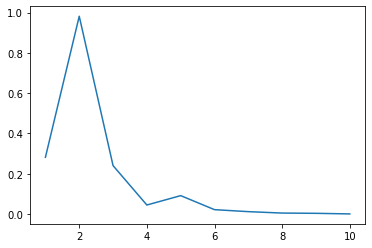

In [117]:
biseccion('exp(x)-x-2',0,2,10**-8,10)

### Método de Newton-Raphson

In [120]:
def newton(f, xo, tol, iterMax):
    x = Symbol('x')
    f1 = sympify(f)
    df = diff(f1)
    error = tol + 1
    k = 0
    it = []
    e = []
    while (tol < error and k < iterMax):
        if (df.evalf(subs={x: xo}) == 0):
            x = []
            k = []
            error = []
            print("La funcion se indefine en xo.")
        else:
            xn = xo - (f1.evalf(subs={x: xo}) / df.evalf(subs={x: xo}))
            error = abs(xn)
            it.append(k)
            e.append(error)
            xo = xn
        k += 1
    matplotlib.pyplot.plot(it, e)
    ans = {
        "x": xn,
        "k": k,
        "error": e[-1]
    }
    return ans

# newton('cos(2*x)**2-x**2',3/4,10**-8,10)

{'x': 0.514933264661129, 'k': 10, 'error': 0.514933264661129}

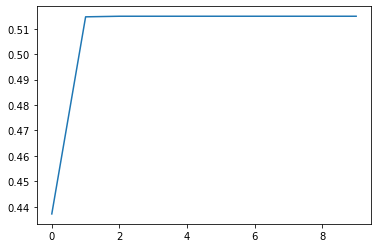

In [132]:
newton('cos(2*x)**2-x**2',3/4,10**-8,10)

### Método de la Secante

In [162]:
def secante(f, xo, xi, tol, iterMax):
    x = Symbol('x')
    f1 = sympify(f)
    error = tol + 1
    k = 0
    it = []
    e = []
    while (tol < error and k < iterMax):
        nume = (xi - xo)
        deno = f1.evalf(subs={x: xi})-f1.evalf(subs={x: xo})
        if(deno == 0):
            it = []
            e = []
            print("La funcion se indefine.")
        else:
            xn = xi - ((nume) / (deno)) * ((f1.evalf(subs={x: xi})))
            error = abs(xn)
            it.append(k)
            e.append(error)
            xo = xi
            xi = xn
        k += 1
    matplotlib.pyplot.plot(it, e)
    ans = {
        "x": xn,
        "k": k,
        "error": e[-1]
    }
    return ans
    
# secante('exp(-(x**2))-x',0,1,10**-8,3)

{'x': 0.652917265247279, 'k': 3, 'error': 0.652917265247279}

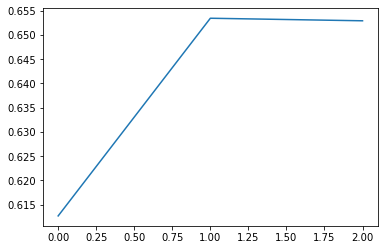

In [163]:
secante('exp(-(x**2))-x',0,1,10**-8,3)

### Método de Falsa Posición

In [151]:
def falsa_posicion(f, a, b, tol, iterMax):
    funcion = sympify(f)
    fa = funcion.subs('x', a)
    fb = funcion.subs('x', b)
    if (fa * fb <= 0):
        error = tol + 1
        k = 0
        it = []
        e = []
        while (tol < error and k < iterMax):
            fa = funcion.subs('x', a)
            fb = funcion.subs('x', b)
            x = b - (((b - a) / (fb - fa)) * fb)
            fa = funcion.subs('x', a)
            fx = funcion.subs('x', x)
            error = abs(fx)
            it.append(k)
            e.append(error)
            
            if (fa * fx < 0):
                b = x
            else:
                a = x
            k +=1
    else:
        x = []
        k = []
        error = []
        print("No cumple la condición del Teorema de Bolzano.")
    matplotlib.pyplot.plot(it, e)
    ans = {
        "x": x,
        "k": k,
        "error": e[-1]
    }
    return ans

# falsa_posicion('cos(x)-x',1/2,3.141592/4,10**-8,40)

{'x': 0.739085130526616, 'k': 4, 'error': 4.49958070802836e-9}

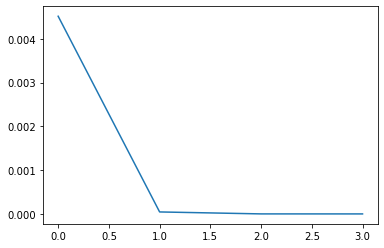

In [152]:
falsa_posicion('cos(x)-x',1/2,3.141592/4,10**-8,40)

### Método del Punto Fijo

In [159]:
def punto_fijo(p, xo, a, b, tol, iterMax):
    x = Symbol('x')
    f1 = sympify(p)
    error = tol + 1
    k = 0
    it = []
    e = []
    while (tol < error and k < iterMax):
        xk = f1.evalf(subs={x: xo})
        error = abs((f1.evalf(subs={x: xk})) - xk)
        e.append(error)
        it.append(k)
        xo = xk
        k += 1
    matplotlib.pyplot.plot(it, e)
    ans = {
        "x": xk,
        "k": k,
        "error": e[-1]
    }
    return ans

# punto_fijo('log(2*x+1)',0.5,1,2,10^-8,5)

{'x': 1.16550958140855, 'k': 5, 'error': 0.0377687306585850}

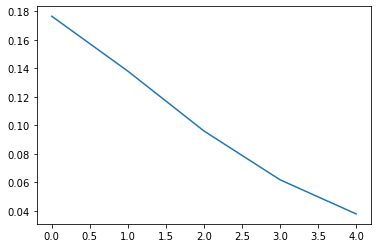

In [160]:
punto_fijo('log(2*x+1)',0.5,1,2,10^-8,5)

### Método de Müller

In [176]:
def muller(f, x0, x1, x2, tol, iterMax):
    x = Symbol('x')
    f1 = sympify(f)
    error = tol + 1
    k = 0
    it = []
    e = []
    while (tol < error and k < iterMax):
        fx = f1.evalf(subs={x: x0})
        fy = f1.evalf(subs={x: x1})
        fz = f1.evalf(subs={x: x2})
        c = fz
        b = ((((x0 - x2)**2) * (fy - fz)) - (((x1 - x2)**2) * (fx - fz))) / ((x0 - x1) * (x0 - x2) * (x1 - x2))
        a = (((x1 - x2) * (fx - fz)) - ((x0 - x2) * (fy - fz))) / ((x0 - x1) * (x0 - x2) * (x1 - x2))
        disc = sqrt((b**2) - 4 * a * c)
        if (0 < b):
            xk = x2 - ((2 * c) / (b + disc))
        else:
            xk = x2 - ((2 * c) / (b - disc))
        error = abs(f1.evalf(subs={x: xk}))
        it.append(k)
        e.append(error)
        d1 = abs(x0 - xk)
        d2 = abs(x1 - xk)
        d3 = abs(x2 - xk)

        if (max(d1, d2, d3) == d1):
            s = sorted([xk, x1, x2])
            x0 = s[0]
            x1 = s[1]
            x2 = s[2]
        elif (max(d1, d2, d3) == d2):
            s = sorted([xk, x0, x2])
            x0 = s[0]
            x1 = s[1]
            x2 = s[2]
        else:
            s = sorted([xk, x0, x1])
            x0 = s[0]
            x1 = s[1]
            x2 = s[2]
        k += 1
    matplotlib.pyplot.plot(it, e)
    ans = {
        "x": xk,
        "k": k,
        "error": e[-1]
    }
    return ans

# muller('sin(x)-x/2',2,2.2,1.8,10^-8,3)

{'x': 1.89549426703420, 'k': 3, 'error': 1.80216642511051e-13}

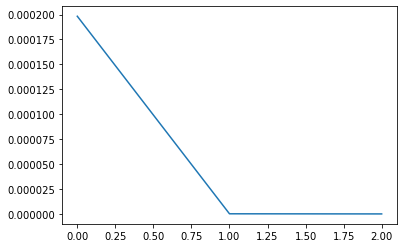

In [175]:
muller('sin(x)-x/2',2,2.2,1.8,10^-8,3)

# Fin